In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [14]:
df=pd.read_csv("LIMFADD.csv")
df.head()

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
0,2,2757,1378.5,0,0,N,N,N,0,N,Bot
1,2,505,252.5,0,0,N,Yes,N,0,N,Scam
2,6786,1782,0.262599469,1589,6051.040404,yes,N,Yes,10,N,Real
3,21,1281,61,0,0,N,Yes,N,0,N,Bot
4,585,1682,2.875213675,2663,926.1920333,yes,N,N,12,Yes,Real


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Followers            15000 non-null  int64 
 1   Following            15000 non-null  int64 
 2   Following/Followers  15000 non-null  object
 3   Posts                15000 non-null  int64 
 4   Posts/Followers      15000 non-null  object
 5   Bio                  15000 non-null  object
 6   Profile Picture      15000 non-null  object
 7   External Link        15000 non-null  object
 8   Mutual Friends       15000 non-null  int64 
 9   Threads              15000 non-null  object
 10  Labels               15000 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.3+ MB


In [16]:
df.describe()

,Followers,Following,Posts,Mutual Friends
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,23397.378933,1385.350000,427.830200,3.011733
std,41920.419061,1600.823163,678.889037,4.203313
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,369.000000,1.000000,0.000000
50%,48.000000,725.500000,4.000000,0.000000
75%,19535.250000,1747.000000,578.250000,6.000000
max,163000.000000,6692.000000,2669.000000,15.000000


In [17]:
df.isnull().sum()

Followers              0
Following              0
Following/Followers    0
Posts                  0
Posts/Followers        0
Bio                    0
Profile Picture        0
External Link          0
Mutual Friends         0
Threads                0
Labels                 0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le= LabelEncoder()
df['Following/Followers'] = le.fit_transform(df['Following/Followers'])
df['Posts/Followers'] = le.fit_transform(df['Posts/Followers'])
df['Bio'] = le.fit_transform(df['Bio'])
df['Profile Picture'] = le.fit_transform(df['Profile Picture'])
df['External Link'] = le.fit_transform(df['External Link'])
df['Threads'] = le.fit_transform(df['Threads'])
df['Labels'] = le.fit_transform(df['Labels'])

In [20]:
df_corr=df.corr()

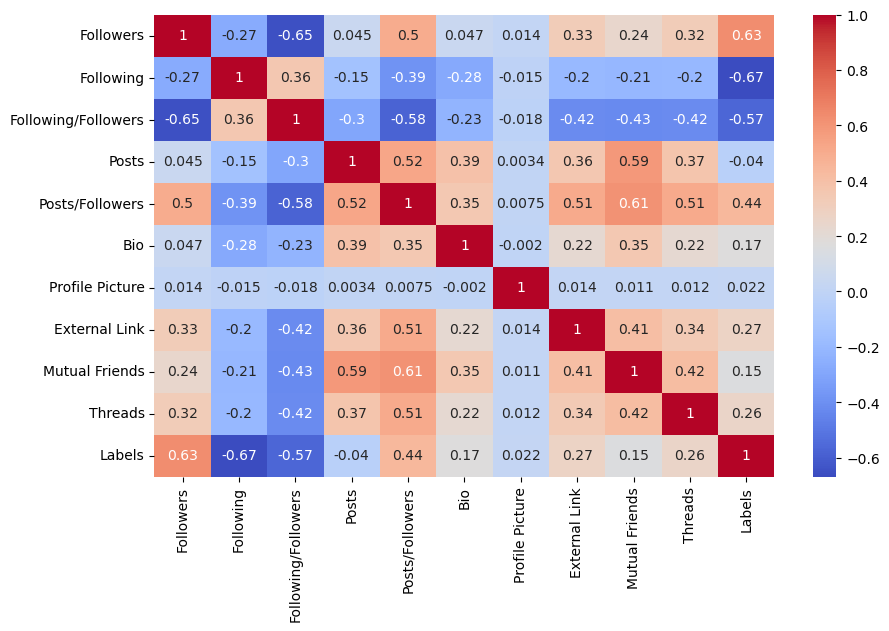

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

<h3>feature selection</h3>

In [23]:
x=df.drop(columns=['Labels'])
type(x)

pandas.core.frame.DataFrame

In [52]:
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(x)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [53]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

In [54]:
print(centroids)
print(labels)

[[6.52995001e+03 1.54710578e+03 7.46986058e+03 4.38604904e+02
  4.00091573e+03 5.10950643e-01 4.94127916e-01 2.03856531e-01
  2.74583399e+00 2.04888113e-01]
 [1.12039305e+05 5.35288991e+02 1.57393036e+03 3.71206839e+02
  8.05061927e+03 5.05838198e-01 5.11676397e-01 5.06255213e-01
  4.40909091e+00 5.04587156e-01]]
[0 0 0 ... 0 0 0]


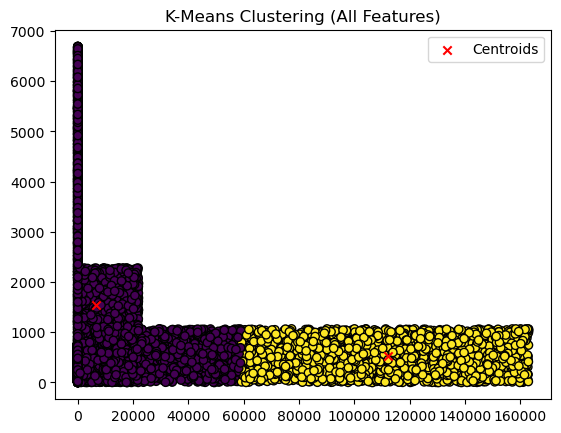

In [55]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:,0], centroids[:,1],marker='x', c='red', label='Centroids')
plt.legend()
plt.title('K-Means Clustering (All Features)')
plt.show()
